In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np 

In [60]:
data = pd.read_csv('../../Dataset/FER2013_LM/landmark_data.csv')
print(data.head())

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.480718   0.865033   0.011751   0.494339   0.809657  -0.120009   
1   0.693867   0.747721  -0.038615   0.733758   0.668090  -0.126214   
2   0.693939   0.451788  -0.075072   0.690447   0.350399  -0.101859   
3   0.526356   0.588929  -0.123498   0.506472   0.461369  -0.193999   
4   0.471670   0.747502  -0.080709   0.455760   0.623900  -0.188465   

   feature_6  feature_7  feature_8  feature_9  ...  feature_1395  \
0   0.484121   0.809364  -0.029411   0.470516  ...      0.546133   
1   0.709196   0.682638  -0.053985   0.724878  ...      0.777323   
2   0.658577   0.406776  -0.061631   0.602316  ...      0.563476   
3   0.512953   0.501413  -0.110522   0.458113  ...      0.540542   
4   0.468718   0.652859  -0.085783   0.425634  ...      0.538771   

   feature_1396  feature_1397  feature_1398  feature_1399  feature_1400  \
0      0.587090     -0.098797      0.710768      0.518932     -0.051465   
1      0.49657

In [61]:
features = data.iloc[:, :-1].values
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [85]:
features.shape[1]

1404

In [62]:
labels = data['label'].values
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)


In [63]:
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
label_mapping

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels_encoded, test_size=0.3, random_state=42)

In [45]:
X_train

array([[-1.27232688,  0.43911731,  0.60604262, ..., -0.45133091,
        -0.34453814, -1.62723337],
       [-0.04707392,  0.46488676, -0.55154988, ...,  0.99914928,
         0.72003527,  0.51545633],
       [-0.92678723, -1.10053593, -0.71157271, ..., -0.35590096,
         0.98744352, -0.01084884],
       ...,
       [-0.07570162,  0.40812306, -0.45914245, ...,  0.21082602,
        -0.42955586, -0.67205161],
       [-0.02357844,  0.38911099,  0.06014418, ...,  0.38837543,
        -0.33719796, -0.42625888],
       [-0.09777136, -0.33005304,  0.07251476, ...,  0.44713901,
         0.36845864, -0.22594308]])

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  test_size=0.3, random_state=42)

In [83]:
X_train.shape[1],

(1404,)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(labels_encoded)), activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)

In [77]:
history = model.fit(X_train, y_train, epochs=90, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/90
508/508 [==============================] - 4s 5ms/step - loss: 1.7786 - accuracy: 0.3177 - val_loss: 1.5268 - val_accuracy: 0.4170
Epoch 2/90
508/508 [==============================] - 3s 5ms/step - loss: 1.5643 - accuracy: 0.3977 - val_loss: 1.4478 - val_accuracy: 0.4401
Epoch 3/90
508/508 [==============================] - 3s 5ms/step - loss: 1.4990 - accuracy: 0.4243 - val_loss: 1.4073 - val_accuracy: 0.4622
Epoch 4/90
508/508 [==============================] - 2s 5ms/step - loss: 1.4685 - accuracy: 0.4364 - val_loss: 1.3789 - val_accuracy: 0.4688
Epoch 5/90
508/508 [==============================] - 3s 5ms/step - loss: 1.4441 - accuracy: 0.4411 - val_loss: 1.3743 - val_accuracy: 0.4701
Epoch 6/90
508/508 [==============================] - 3s 5ms/step - loss: 1.4242 - accuracy: 0.4500 - val_loss: 1.3534 - val_accuracy: 0.4777
Epoch 7/90
508/508 [==============================] - 3s 6ms/step - loss: 1.4184 - accuracy: 0.4548 - val_loss: 1.3469 - val_accuracy: 0.4826
Epoch 

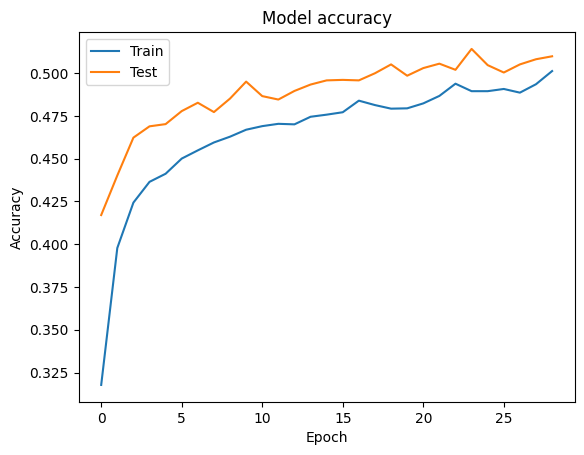

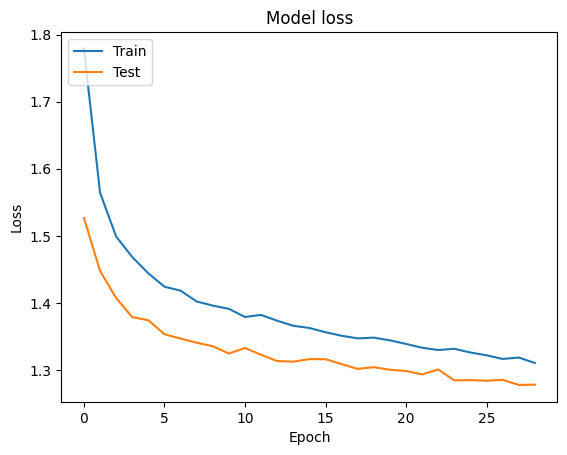

In [78]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [79]:
model.evaluate(X_test,y_test)

311/311 [==============================] - 1s 2ms/step - loss: 1.2727 - accuracy: 0.5181


[1.2726590633392334, 0.5181425213813782]

In [82]:
model.save('../Recognition/Model/FER_LM_v1.keras')

In [46]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [49]:
y_test

array([5, 5, 4, ..., 1, 4, 5])

In [48]:
evaluation = svc_model.predict(X_test)
print(evaluation)

[4 5 5 ... 0 4 5]


In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, evaluation))

              precision    recall  f1-score   support

           0       0.46      0.26      0.33      1283
           1       0.00      0.00      0.00       139
           2       0.30      0.10      0.15      1394
           3       0.74      0.82      0.78      2634
           4       0.39      0.66      0.49      1782
           5       0.34      0.40      0.37      1549
           6       0.62      0.57      0.60      1168

    accuracy                           0.51      9949
   macro avg       0.41      0.40      0.39      9949
weighted avg       0.50      0.51      0.49      9949



d:\Program Files (x86)\Python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files (x86)\Python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files (x86)\Python\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
